In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

In [ ]:
# !pip install -U finance-datareader

In [2]:
import FinanceDataReader as fdr
print(fdr.__version__)

0.9.50


In [3]:
krx_df = \
  pd.read_csv('https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv')
krx_df.shape

(2612, 10)

In [4]:
krx_df.columns

Index(['Symbol', 'Market', 'Name', 'Sector', 'Industry', 'ListingDate',
       'SettleMonth', 'Representative', 'HomePage', 'Region'],
      dtype='object')

In [5]:
krx_df['ListingDate'] = pd.to_datetime(krx_df['ListingDate'])
krx_df['ListingYear'] = krx_df['ListingDate'].dt.year
krx_df['ListingYear'][:3]

0    2002.0
1    2015.0
2    1999.0
Name: ListingYear, dtype: float64

In [6]:
market_year_df = pd.crosstab(krx_df['Market'], krx_df['ListingYear'])
market_year_df

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


<Axes: xlabel='ListingYear', ylabel='count'>

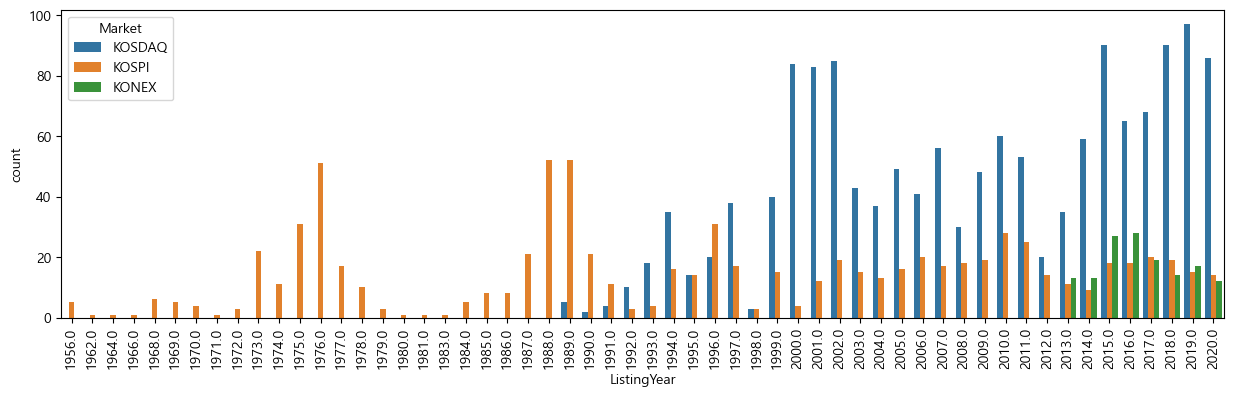

In [7]:
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=krx_df, x='ListingYear', hue='Market')

<Axes: xlabel='ListingYear'>

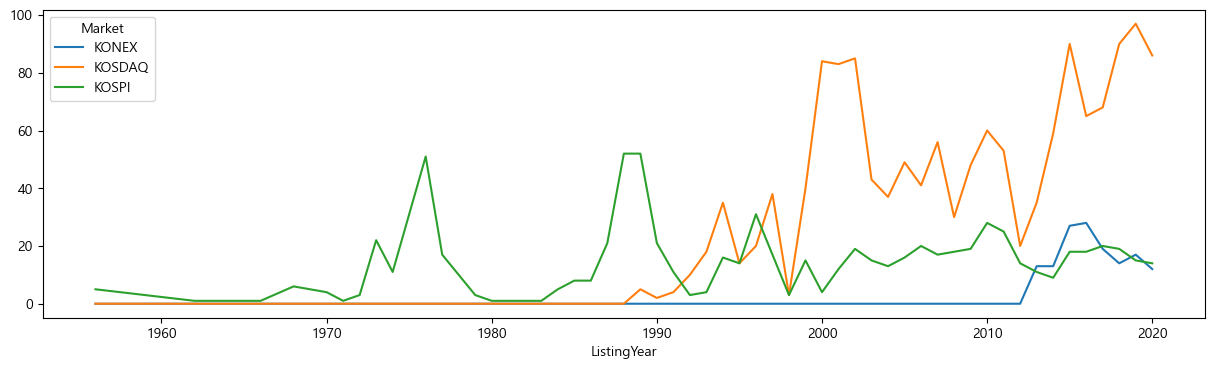

In [8]:
market_year_df.T.plot(figsize=(15, 4))

array([<Axes: xlabel='ListingYear'>, <Axes: xlabel='ListingYear'>,
       <Axes: xlabel='ListingYear'>], dtype=object)

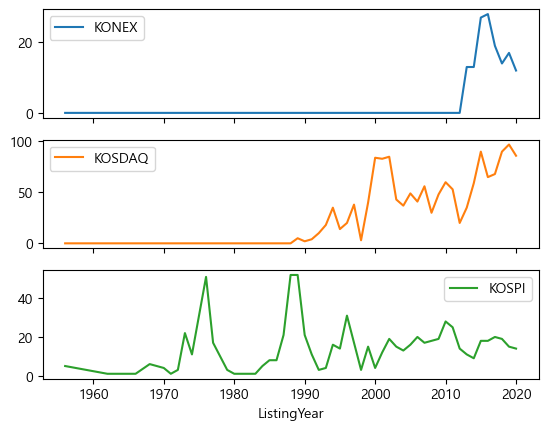

In [9]:
market_year_df.T.plot(subplots=True)

<Axes: xlabel='ListingYear'>

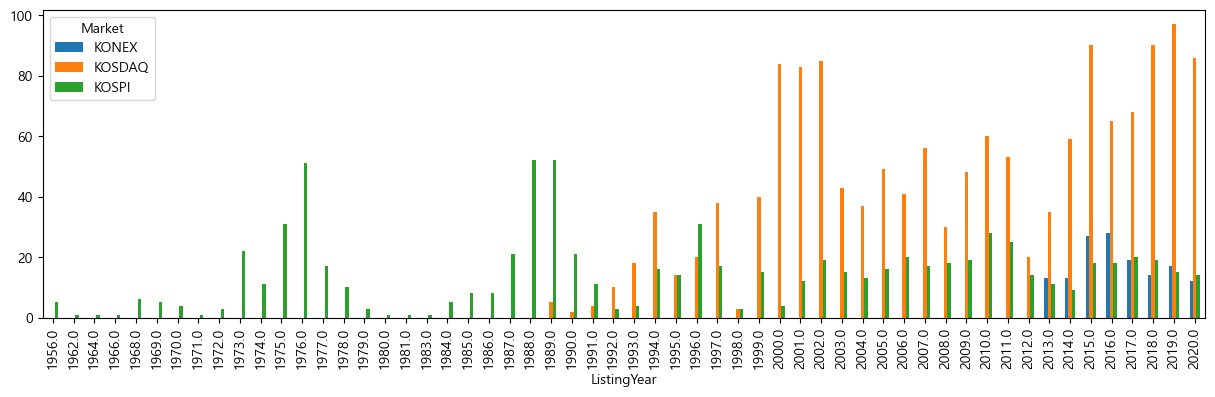

In [10]:
'''
막대 그래프로 시각화하기 - bar() 함수
'''
market_year_df.T.plot.bar(figsize=(15, 4))

In [ ]:
market_year_df.columns

In [11]:
'''
market_year_df 의 컬럼의 type 이 현재 float type 인데
int type 으로 변환하기 : astype() 메소드 사용
'''
market_year_df.columns = market_year_df.columns.astype(int)
market_year_df.columns

Int64Index([1956, 1962, 1964, 1966, 1968, 1969, 1970, 1971, 1972, 1973, 1974,
            1975, 1976, 1977, 1978, 1979, 1980, 1981, 1983, 1984, 1985, 1986,
            1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
            1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
            2020],
           dtype='int64', name='ListingYear')

In [12]:
market_year_df

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


<Axes: xlabel='ListingYear'>

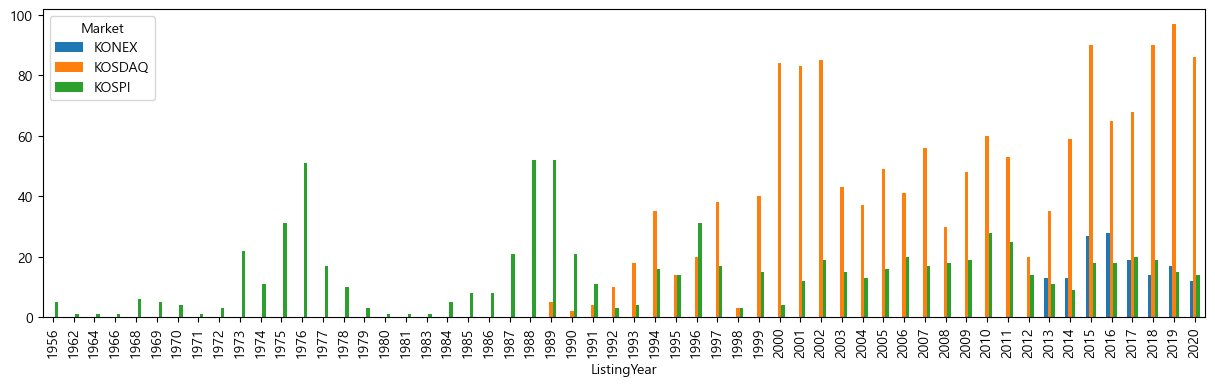

In [13]:
market_year_df.T.plot.bar(figsize=(15, 4))

In [14]:
'''
빈도수 시각화하기
  ㄴ  groupby() / pivot_table() 사용
  
  데이터프레임이름.groupby([그루핑기준컬럼])[메소드의연산대상컬럼].메소드()
    
'''
# 1)  groupby() 

#  Series
year_market_sr = krx_df.groupby(['ListingYear','Market'])['Symbol'].count()

# Series 에서 reset_index() 를 실행해서 DataFrame 구조로 만들기
year_market_sr.reset_index()

,ListingYear,Market,Symbol
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


In [18]:
year_market_df = year_market_sr.reset_index(name='count')
year_market_df

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


In [15]:
# 2) pivot_table()
# year_market_sr = krx_df.groupby(['ListingYear','Market'])['Symbol'].count()
year_market_df = \
krx_df.pivot_table(index=['ListingYear', 'Market'], values='Symbol', aggfunc='count')

year_market_reset_df = year_market_df.reset_index()

# 컬럼 이름 변경하기 - 1 
year_market_reset_df.columns = ['ListingYear', 'Market', 'count']

year_market_reset_df

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


In [16]:
# 컬럼 이름 변경하기 - 2 : rename(columns={old:new, old:new, ....})
#year_market_reset_df = 
#year_market_reset_df
year_market_re_df = year_market_df.reset_index().rename(columns={'Symbol':'count'})
year_market_re_df

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


<Axes: xlabel='ListingYear', ylabel='count'>

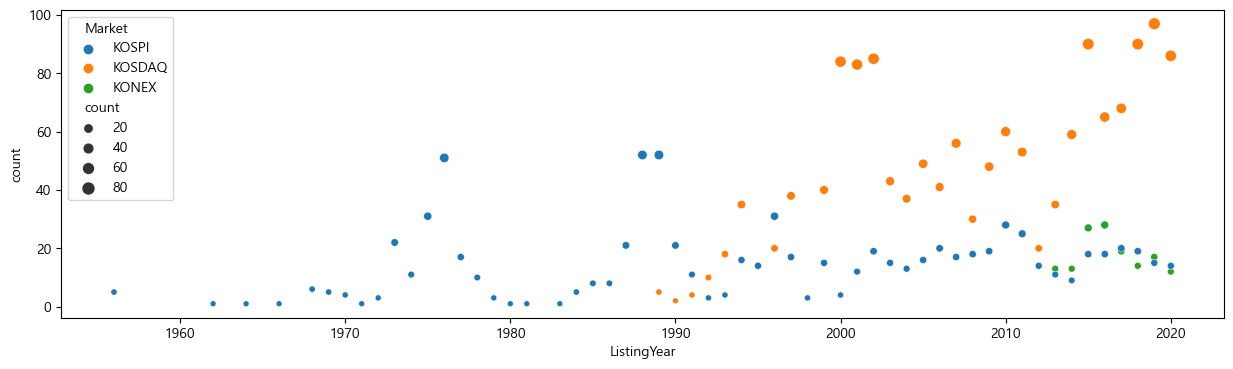

In [19]:
# groupby() 결과를 산점도로 시각화하기
# seaborn 의 scatterplot()  사용함
plt.figure(figsize=(15, 4))
sns.scatterplot(data=year_market_df,
                x='ListingYear', y='count',
                hue='Market', size='count')

<Axes: xlabel='ListingYear', ylabel='count'>

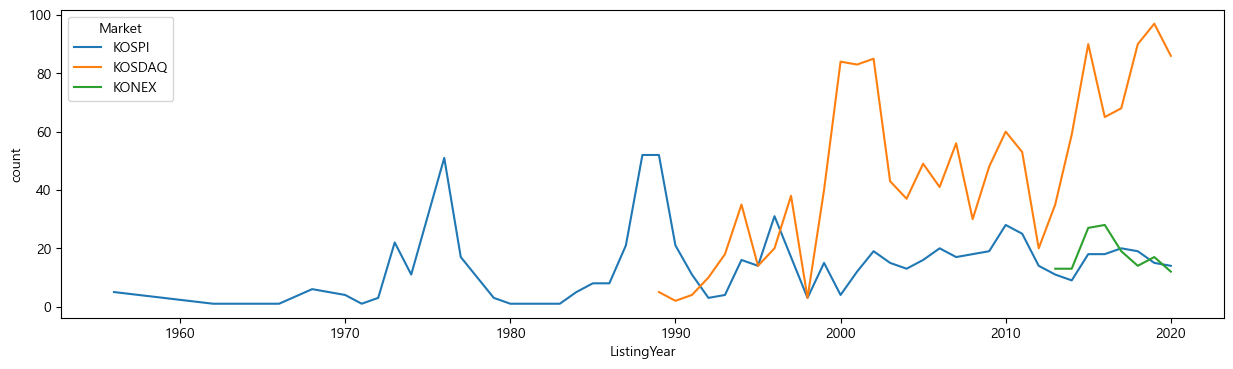

In [20]:
'''
lineplot() : ci=None <-- 신뢰도 제외 옵션
'''
plt.figure(figsize=(15, 4))
sns.lineplot(data=year_market_df,
                x='ListingYear', y='count',
                hue='Market', ci=None)

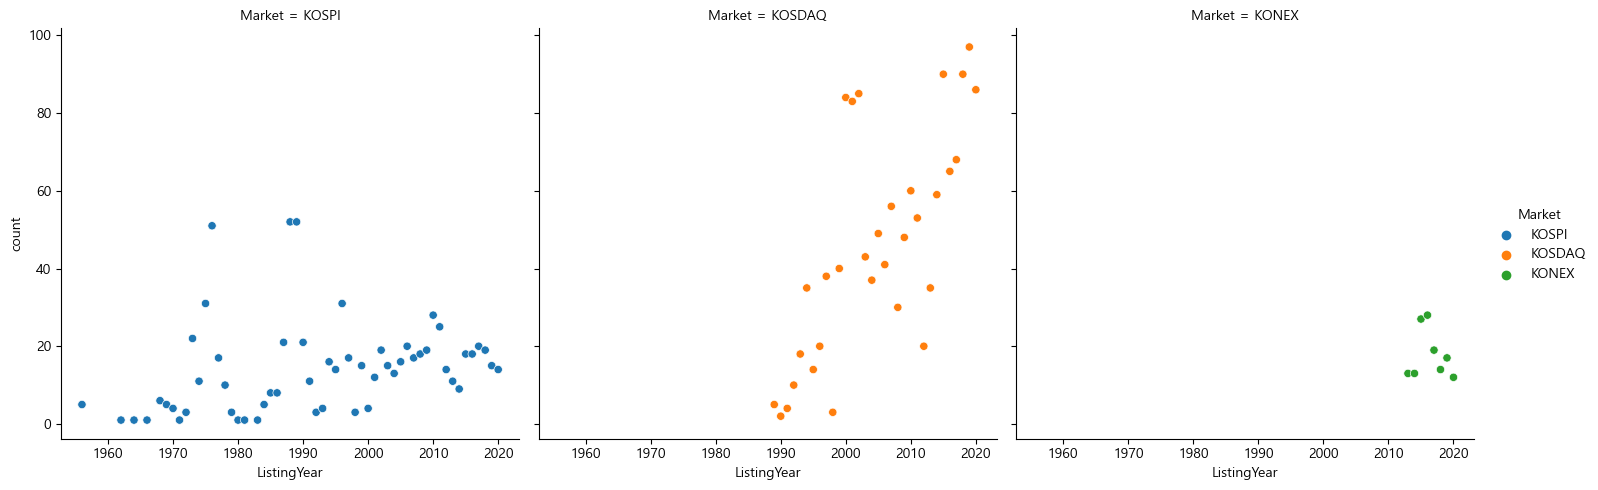

In [21]:
'''
relplot() 으로 subplot 시각화하기 - 산점도(kind='scatter' 가 기본값)
'''
sns.relplot(data=year_market_df,
            x='ListingYear', y='count',
            col='Market', hue='Market', kind='scatter')

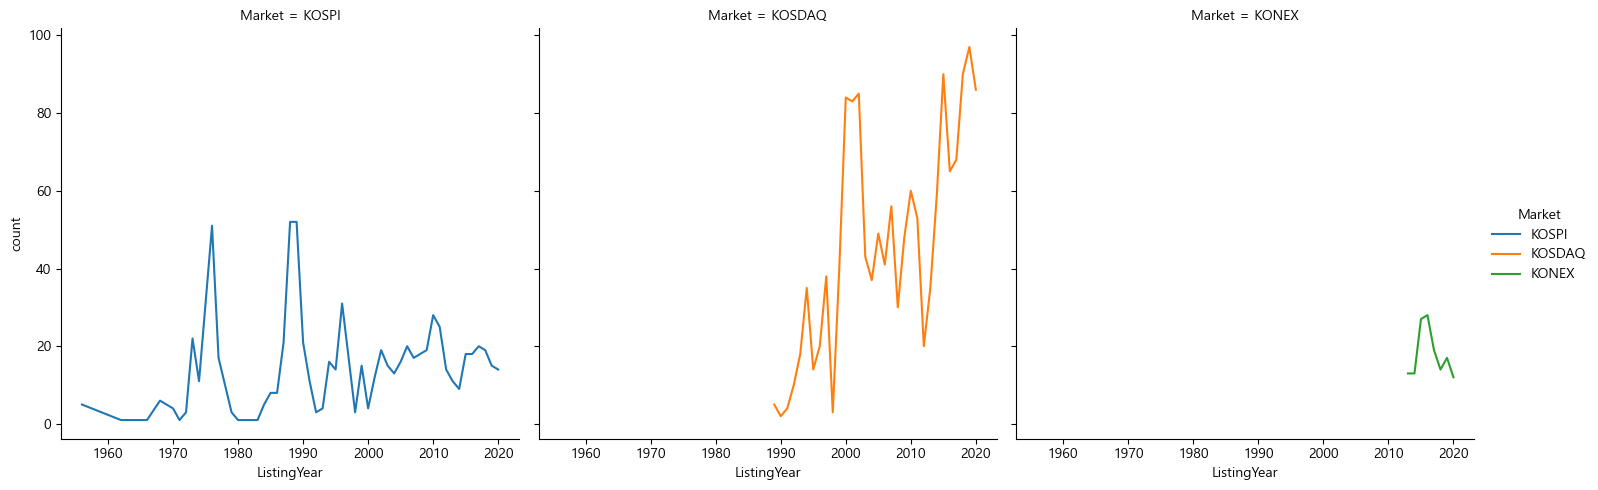

In [22]:
'''
relplot() 으로 subplot 시각화하기 - 선그래프(kind='line')
'''
sns.relplot(data=year_market_df,
            x='ListingYear', y='count',
            col='Market', hue='Market', kind='line')

In [ ]:
'''
히스토그램으로 시각화하기 - hist()
'''
krx_df['ListingYear'].plot.hist(bins=10, figsize=(10, 4), title='상장연도')
krx_df['ListingYear'].plot.hist(bins=20, figsize=(10, 4), title='상장연도')
krx_df['ListingYear'].plot.hist(bins=30, figsize=(10, 4), title='상장연도')

In [23]:
'''
회사 소재지가 케이먼 제도에 있는 기업 찾기
'''
krx_df[krx_df['Region']=='케이맨 제도'].reset_index(drop=True)[:]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
1,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
2,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
3,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
4,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [24]:
'''
1970 년 이전에 상장한 회사 찾기
'''
krx_df[krx_df['ListingYear'] <= 1970][['Symbol','Market','Name','ListingYear']]

,Symbol,Market,Name,ListingYear
15,000120,KOSPI,CJ대한통운,1956.0
34,001530,KOSPI,DI동일,1964.0
127,003550,KOSPI,LG,1970.0
162,004250,KOSPI,NPC,1969.0
266,000050,KOSPI,경방,1956.0
468,001680,KOSPI,대상,1970.0
526,001440,KOSPI,대한전선,1968.0
528,001790,KOSPI,대한제당,1968.0
530,001130,KOSPI,대한제분,1970.0
531,003490,KOSPI,대한항공,1966.0


In [25]:
'''
 2020년 상장한 서울특별시에 소재한 코스피 종목 찾기
'''
condition1 = krx_df['ListingYear'] == 2020
condition2 = krx_df['Region'] == '서울특별시'
condition3 = krx_df['Market'] == 'KOSPI'

krx_df[condition1 & condition2 & condition3]
krx_df[condition1 & condition2 & condition3]['Name']
# krx_df[condition1 & condition2 & condition3]['Name'].values

44      ESR켄달스퀘어리츠
824       미래에셋맵스리츠
932            빅히트
1452       에이플러스에셋
1796     이지스레지던스리츠
1801       이지스밸류리츠
1905      제이알글로벌리츠
2033       케이씨씨글라스
2065      코람코에너지리츠
2213        티와이홀딩스
Name: Name, dtype: object

In [29]:
# 지역별(Region) Sector : Pandas 의 crosstab() 으로 연산하기
#  아래와 같이 하면 Sector 가 index 가 되고, Region 이 column 이 됨
sr_df = pd.crosstab(krx_df['Sector'], krx_df['Region'])
sr_df

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,12,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [30]:
'''
sr_df 에서 특정 지역(column)만 조회하기
'''
sr_df[['서울특별시','경기도','인천광역시']]

Region,서울특별시,경기도,인천광역시
Sector,,,
1차 비철금속 제조업,3,7,0
1차 철강 제조업,11,4,4
가구 제조업,3,4,1
가전제품 및 정보통신장비 소매업,1,0,0
가정용 기기 제조업,1,6,0
...,...,...,...
해상 운송업,5,0,0
"해체, 선별 및 원료 재생업",0,1,0
화학섬유 제조업,6,1,0


In [31]:
'''
sr_df 에서 특정 섹터(row)만 조회하기 : loc[] 연산자

.loc[행]  <-- 모든 열 조회
.loc[행, 열]  <-- 지정한 열만 조회
.loc[조건식, 열]  <-- 조건이 True 인 열만 조회
'''

# sr_df 에서 '소프트웨어 개발 및 공급업' Sector(행) 만 조회하기
# 행 하나만 조회하면 Series 구조가 됨
sr_df.loc[['소프트웨어 개발 및 공급업']]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,38,0,0,1,0,1,0,1,89,...,0,0,2,0,0,0,0,2,0,1


In [32]:
sr_df.loc['소프트웨어 개발 및 공급업']

Region
강원도         0
경기도        38
경상남도        0
경상북도        0
광주광역시       1
대구광역시       0
대전광역시       1
미국          0
부산광역시       1
서울특별시      89
세종특별자치시     0
울산광역시       0
인천광역시       0
일본          2
전라남도        0
전라북도        0
제주특별자치도     0
충청남도        0
충청북도        2
케이맨 제도      0
홍콩          1
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [ ]:
sr_df.loc['소프트웨어 개발 및 공급업'].sort_values(ascending=False)

In [ ]:
'''
# sr_df 에서 '소프트웨어 개발 및 공급업'
             '금융 지원 서비스업' 
             '의약품 제조업' Sector(행) 만 조회하기
'''
sr_df.loc[['소프트웨어 개발 및 공급업','금융 지원 서비스업','의약품 제조업']]

In [ ]:
'''
# sr_df 에서 '소프트웨어 개발 및 공급업'
             '금융 지원 서비스업' 
             '의약품 제조업' Sector(행) 의 서울특별시 column만 조회하기
'''
sr_df.loc[['소프트웨어 개발 및 공급업','금융 지원 서비스업','의약품 제조업'], ['서울특별시']]

In [ ]:
'''
# sr_df 에서 '소프트웨어 개발 및 공급업'
             '금융 지원 서비스업' 
             '의약품 제조업' Sector(행) 의 
              '서울특별시','경기도','인천광역시' column만 조회하기
'''
sr_df.loc[['소프트웨어 개발 및 공급업','금융 지원 서비스업','의약품 제조업'], ['서울특별시','경기도','인천광역시']]

In [ ]:
'''
Sector 가 '소프트웨어 개발 및 공급업' 인 기업들의
지역(Region) 별 빈도수 구하기
'''
sr_df.loc['소프트웨어 개발 및 공급업'].sort_values().plot.barh()

In [ ]:
'''
Sector 가 '의약품 제조업' 인 기업들의 지역별 빈도수 시각화
'''
sr_df.loc['의약품 제조업'].sort_values().plot.barh()

In [120]:
'''
.iloc[행]
.iloc[행, 열]
'''
sr_df.iloc[-5:, -5:]

Region,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,
해상 운송업,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,0,0,0,0
화학섬유 제조업,0,0,0,0,0
환경 정화 및 복원업,0,1,0,0,0
회사 본부 및 경영 컨설팅 서비스업,0,0,0,0,0
